**done remotely on greenplanet**

In [1]:
import numpy
import gdal
import osr
import glob
import xarray
import datetime
import re
import cartopy
import cmocean
import matplotlib.pyplot as mp
import scipy.stats
import netCDF4
import pandas

import dask

mp.rcParams.update({'mathtext.default': 'regular'})

open all files as a separate gdal dataset

* store ALL FILES in a list called ```file_list_datetime_all``` (for MOD11A2 size~27,000(
* store all yearday strings in a list called ```file_list_yearday_strings_all```

In [2]:
!ls DATA_nc/*LST_day*.nc

DATA_nc/MOD11A2_LST_day_2000.nc  DATA_nc/MOD11A2_LST_day_2010.nc
DATA_nc/MOD11A2_LST_day_2001.nc  DATA_nc/MOD11A2_LST_day_2011.nc
DATA_nc/MOD11A2_LST_day_2002.nc  DATA_nc/MOD11A2_LST_day_2012.nc
DATA_nc/MOD11A2_LST_day_2003.nc  DATA_nc/MOD11A2_LST_day_2013.nc
DATA_nc/MOD11A2_LST_day_2004.nc  DATA_nc/MOD11A2_LST_day_2014.nc
DATA_nc/MOD11A2_LST_day_2005.nc  DATA_nc/MOD11A2_LST_day_2015.nc
DATA_nc/MOD11A2_LST_day_2006.nc  DATA_nc/MOD11A2_LST_day_2016.nc
DATA_nc/MOD11A2_LST_day_2007.nc  DATA_nc/MOD11A2_LST_day_2017.nc
DATA_nc/MOD11A2_LST_day_2008.nc  DATA_nc/MOD11A2_LST_day_2018.nc
DATA_nc/MOD11A2_LST_day_2009.nc


In [3]:
#data_filenames = sorted(glob.glob('*DATA.npy'))
#datetime_filenames = sorted(glob.glob('*TIMES.npy'))

# for daytime lst

subset southwest part of Borneo using this syntax:

```
lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2200,3250))
```

In [4]:
data_mfds = xarray.open_mfdataset('DATA_nc/*LST_day*', chunks={'lat':100,'lon':100}, parallel=True)#, decode_times=False)
lst_day = data_mfds['LST_day']
lst_time = data_mfds['time']
lst_time_dayssince = lst_time.values

In [5]:
import dask.diagnostics

In [6]:
#lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2225,3225))
#lst_day_borneo = lst_day.isel(lat=slice(750,1750), lon=slice(2225,3225))
lst_day_borneo1 = lst_day.isel(lat=slice(900,1100), lon=slice(2400,2700))
lst_day_borneo2 = lst_day.isel(lat=slice(1400,1600), lon=slice(2350,2550))

[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  0.1s


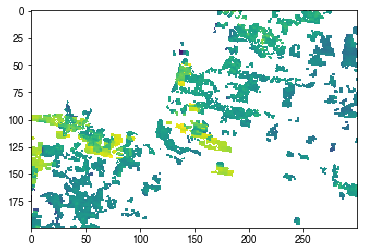

In [9]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo1.isel(time=400), origin='upper')

[########################################] | 100% Completed |  1.6s
[########################################] | 100% Completed |  0.1s


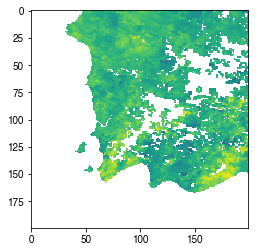

In [8]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo2.isel(time=110), origin='upper')

[###########################             ] | 68% Completed | 21.1s

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 29.7s
[########################################] | 100% Completed |  0.1s


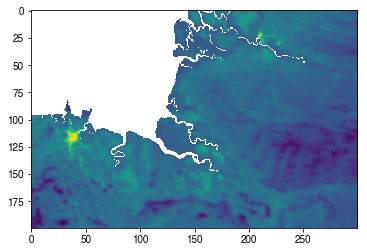

In [10]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo1.mean(dim='time').values, origin='upper')

[###########################             ] | 68% Completed | 20.9s

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[############################            ] | 70% Completed | 21.4s

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 29.7s
[########################################] | 100% Completed |  0.1s


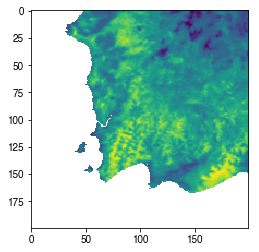

In [11]:
with dask.diagnostics.ProgressBar():
    mp.imshow(lst_day_borneo2.mean(dim='time').values, origin='upper')

In [12]:
#lst_day_borneo_values = lst_day_borneo.values
with dask.diagnostics.ProgressBar():
    lst_day_borneo1_values = lst_day_borneo1.values
    lst_day_borneo2_values = lst_day_borneo2.values

[########################################] | 100% Completed | 29.5s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed | 29.3s
[########################################] | 100% Completed |  0.1s


In [13]:
#mask = ~numpy.isnan(lst_day_borneo_values)
mask = ~numpy.isnan(lst_day_borneo1_values)
mask = ~numpy.isnan(lst_day_borneo2_values)

In [14]:
lst_day_borneo1_areamean = numpy.nanmean(lst_day_borneo1_values, axis=(1,2))
lst_day_borneo2_areamean = numpy.nanmean(lst_day_borneo2_values, axis=(1,2))

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


Text(0,1.02,'land surface temperature')

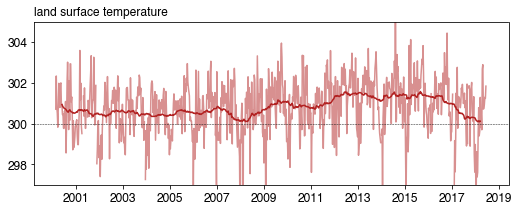

In [15]:
plot_this = lst_day_borneo1_areamean

fontsize=12

fig, ax = mp.subplots(1,1)
fig.set_size_inches(8.5,3)

ax.plot(lst_time, plot_this, c='firebrick', alpha=0.5)
ax.plot(lst_time, pandas.Series(plot_this).rolling(window=45,center=True,min_periods=35).mean(), c='firebrick')
ax.axhline(300., lw=0.5, ls='--', c='0.1')

ax.set_ylim(297,305)
ax.tick_params(labelsize=fontsize)

ax.text(s='land surface temperature', x=0, y=1.02,\
        fontsize=fontsize, ha='left', va='bottom', \
        transform=ax.transAxes)


Text(0,1.02,'land surface temperature')

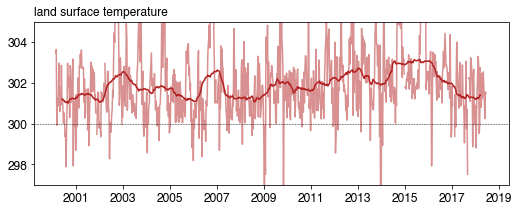

In [16]:
plot_this = lst_day_borneo2_areamean

fontsize=12

fig, ax = mp.subplots(1,1)
fig.set_size_inches(8.5,3)

ax.plot(lst_time, plot_this, c='firebrick', alpha=0.5)
ax.plot(lst_time, pandas.Series(plot_this).rolling(window=45,center=True,min_periods=35).mean(), c='firebrick')
ax.axhline(300., lw=0.5, ls='--', c='0.1')

ax.set_ylim(297,305)
ax.tick_params(labelsize=fontsize)

ax.text(s='land surface temperature', x=0, y=1.02,\
        fontsize=fontsize, ha='left', va='bottom', \
        transform=ax.transAxes)

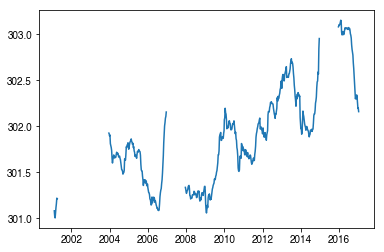

In [67]:
mp.plot(lst_time, pandas.Series(lst_day_borneo2_areamean).rolling(window=45).mean())

In [107]:
slope = numpy.zeros((lst_day_borneo_values.shape[1:3]))
intercept = numpy.zeros((lst_day_borneo_values.shape[1:3]))
rval = numpy.zeros((lst_day_borneo_values.shape[1:3]))
pval = numpy.zeros((lst_day_borneo_values.shape[1:3]))
stderr = numpy.zeros((lst_day_borneo_values.shape[1:3]))

for i in range(1000):
    for j in range(1000):
        try:
            slope[i,j], intercept[i,j], rval[i,j], pval[i,j], stderr[i,j] = \
            scipy.stats.linregress(lst_time_dayssince[mask[:,i,j]], lst_day_borneo_values[:,i,j][mask[:,i,j]])
        except:
            ValueError

* deg C per day * 365 days per year

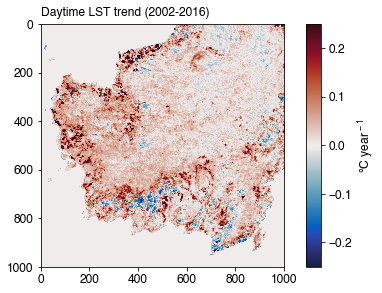

In [127]:
fontsize = 12
fig = mp.figure(figsize=(4.25,4))

ax = fig.add_subplot(111)
image = ax.imshow(slope*365.25, vmin=-0.25, vmax=0.25, cmap=cmocean.cm.balance)
ax.tick_params(labelsize=fontsize)

ax.text(s='Daytime LST trend (2002-2016)', x=0,y=1.02,
        fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0.05,axpos.y0,0.05,axpos.height])
cbar = mp.colorbar(image, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C year$^{\,-1}$', fontsize=fontsize)

mp.savefig('../figures/daytime_lst_trend_borneo.png', dpi=600, bbox_inches='tight', transparent=True)

# for nighttime lst

In [17]:
data_mfds = xarray.open_mfdataset('DATA_nc/*LST_night*', chunks={'lat':100,'lon':100}, parallel=True, decode_times=False)
lst_night = data_mfds['LST_night']
lst_time = data_mfds['time']
lst_time_dayssince = lst_time.values

In [6]:
#lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2225,3225))
lst_night_borneo = lst_night.isel(lat=slice(750,1750), lon=slice(2225,3225))

In [7]:
lst_night_borneo_values = lst_night_borneo.values

In [8]:
mask = ~numpy.isnan(lst_night_borneo_values)

In [9]:
slope = numpy.zeros((lst_night_borneo_values.shape[1:3]))
intercept = numpy.zeros((lst_night_borneo_values.shape[1:3]))
rval = numpy.zeros((lst_night_borneo_values.shape[1:3]))
pval = numpy.zeros((lst_night_borneo_values.shape[1:3]))
stderr = numpy.zeros((lst_night_borneo_values.shape[1:3]))

for i in range(1000):
    for j in range(1000):
        try:
            slope[i,j], intercept[i,j], rval[i,j], pval[i,j], stderr[i,j] = \
            scipy.stats.linregress(lst_time_dayssince[mask[:,i,j]], lst_night_borneo_values[:,i,j][mask[:,i,j]])
        except:
            ValueError

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


* deg C per day * 365 days per year

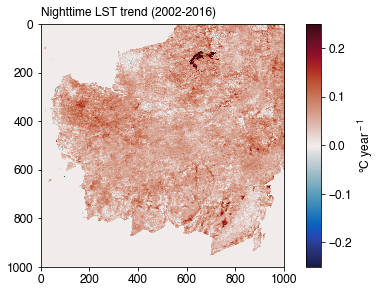

In [10]:
fontsize = 12
fig = mp.figure(figsize=(4.25,4))

ax = fig.add_subplot(111)
image = ax.imshow(slope*365.25, vmin=-0.25, vmax=0.25, cmap=cmocean.cm.balance)
ax.tick_params(labelsize=fontsize)

ax.text(s='Nighttime LST trend (2002-2016)', x=0,y=1.02,
        fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0.05,axpos.y0,0.05,axpos.height])
cbar = mp.colorbar(image, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C year$^{\,-1}$', fontsize=fontsize)

mp.savefig('../figures/nighttime_lst_trend_borneo.png', dpi=600, bbox_inches='tight', transparent=True)

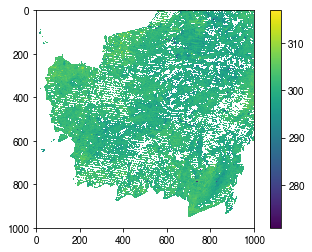

In [69]:
mp.imshow(lst_day_subset_values[0,:,:])
mp.colorbar()

In [16]:
lst_day_subset_timemean = lst_day_subset.mean(dim='time')

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


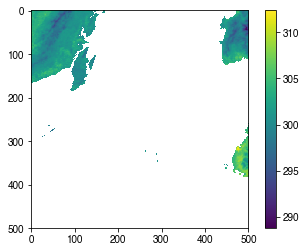

In [17]:
mp.imshow(lst_day_subset_timemean.values)
mp.colorbar()